# 230968126 Week 9

Name :- Kewal Thacker, Section A, Batch 1

EXERCISE 1: 
An online grocery store has captured amount spent per annum (in Indian rupees) by 20 customers 
on apparel and beauty and healthcare products and given in the file customerspends.csv. It contains 
the following records.
• Customer − Customer ID
• Apparel − Amount spent in apparel products
• Beauty and Healthcare − Amount spent in beauty and healthcare products


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("D:\\230968126_Kewal\\Week9\\customerspends.csv")
df

,Customer,Apparel,Beauty and Healthcare
0,1,21.10,0.70
1,2,15.23,5.50
2,3,5.22,18.60
3,4,31.10,1.80
4,5,6.12,21.50
5,6,14.50,8.20
6,7,8.50,16.20
7,8,26.50,2.20
8,9,4.34,17.70
9,10,13.75,7.30


1. Create a scatter plot to depict the customer spends on apparel and beauty and healthcare 
products

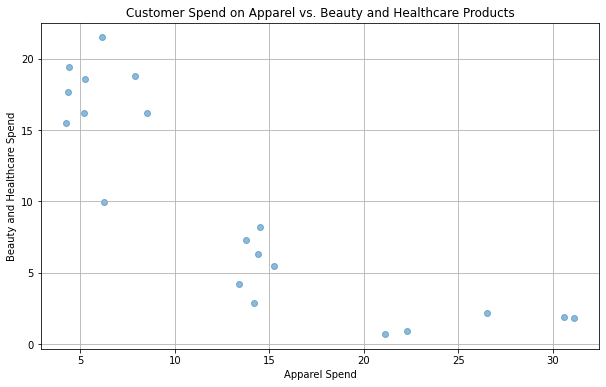

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Apparel'], df['Beauty and Healthcare'], alpha=0.5)
plt.title('Customer Spend on Apparel vs. Beauty and Healthcare Products')
plt.xlabel('Apparel Spend')
plt.ylabel('Beauty and Healthcare Spend')
plt.grid(True)
plt.show()

2. Identify number of clusters existing in the dataset.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


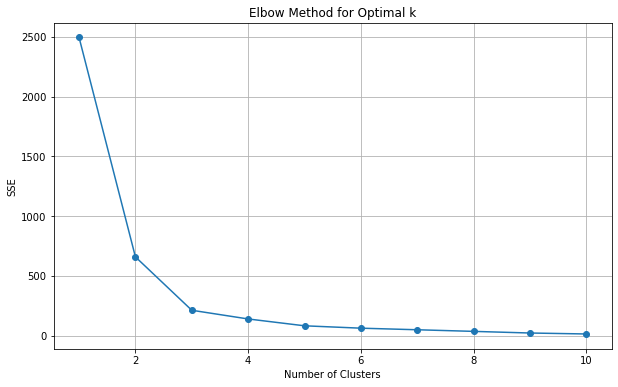

In [5]:
from sklearn.cluster import KMeans
sse = []
k_range = range(1, 11) 

for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[['Apparel', 'Beauty and Healthcare']])
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.grid(True)
plt.show()

Hence we can infer that there are 3 main clusters in the data

3. Use dendrogram and elbow method to verify if the number of clusters suggested is same as 
clusters visible in the scatter plot in Question 1.

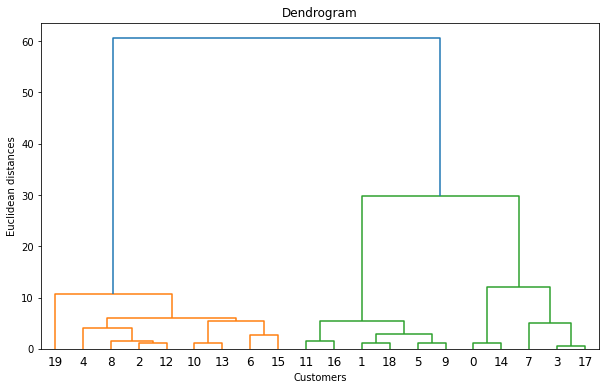

In [6]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(df[['Apparel', 'Beauty and Healthcare']], method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()


4. Create the number of clusters as suggested by the elbow method using K-means algorithm.

In [8]:
optimal_k = 3  

kmeans = KMeans(n_clusters=optimal_k)
df['cluster'] = kmeans.fit_predict(df[['Apparel', 'Beauty and Healthcare']])


5. Print the records of customers in each cluster and the cluster center of each cluster
separately. Explain the clusters intuitively

In [9]:
for i in range(optimal_k):
    print(f"\nCluster {i} records:")
    print(df[df['cluster'] == i])

print("\nCluster Centers:")
print(kmeans.cluster_centers_)



Cluster 0 records:
    Customer  Apparel  Beauty and Healthcare  cluster
2          3     5.22                  18.60        0
4          5     6.12                  21.50        0
6          7     8.50                  16.20        0
8          9     4.34                  17.70        0
10        11     5.20                  16.20        0
12        13     4.40                  19.40        0
13        14     4.25                  15.50        0
15        16     7.90                  18.80        0
19        20     6.25                   9.98        0

Cluster 1 records:
    Customer  Apparel  Beauty and Healthcare  cluster
0          1     21.1                    0.7        1
3          4     31.1                    1.8        1
7          8     26.5                    2.2        1
14        15     22.3                    0.9        1
17        18     30.6                    1.9        1

Cluster 2 records:
    Customer  Apparel  Beauty and Healthcare  cluster
1          2    15.23 